In [1]:
# Requires Python3 Kernel (3.6) as pyrealsense is installed here on hand
import pyrealsense2 as rs
import numpy as np
import math
import cv2
# Used to display Matplotlib plots in Jupyter
%matplotlib inline
import matplotlib.pyplot as plt
import time

# PIL used to save images as pngs
from PIL import Image

ModuleNotFoundError: No module named 'pyrealsense2'

In [35]:
pipe = rs.pipeline()
config = rs.config()

# Getting information about the connected realsense model (device object) - D410
pipeProfile = config.resolve(rs.pipeline_wrapper(pipe))
device = pipeProfile.get_device()

# Setting attributes for stream
# Depth Stream (640 x 480) 30 fps - D410 Sensor has max 1280 x 720
config.enable_stream(rs.stream.depth,1280,720,rs.format.z16,30)

# No Color, only Infrared on D410 Stream (640 x 480) 30 fps - D410 Sensor has max 1280 x 720

config.enable_stream(rs.stream.infrared,1280,720,rs.format.bgr8,30)

# Starting the pipeline based on the specified configuration
# pipe.start(config)

In [36]:
for s in device.sensors:
    print(s.get_info(rs.camera_info.name))

Stereo Module


In [48]:
def takeImages(pipe,config,saveImages=False):
    # Starting the pipeline based on the specified configuration
    pipe.start(config)
    # Return's unprocessed depth and infrared images as tuple of 2 numpy array
    frames = pipe.wait_for_frames()
    depthFrame = frames.get_depth_frame() # pyrealsense2.depth_frame
    irFrame = frames.get_infrared_frame() # pyrealsense2.video_frame
    # other method is get_infrared_frame
    rawIRImage = np.asanyarray(irFrame.get_data())
    rawDepthImage = np.asanyarray(depthFrame.get_data()) 
    if saveImages:
        np.save("depthImage3",rawDepthImage)
        np.save("irImage3",rawIRImage)
        im1 = Image.fromarray(rawIRImage)
        im1.save("irImage3.jpeg")
    pipe.stop()
    return rawDepthImage,rawIRImage
    # Set all distances equal or greater than 32" (812 mm) to 812
    # depthImage[depthImage >= 812] = 812
    # print(np.max(depthImage))
    # depthImage = 255 - ((depthImage/812)*255)# Apply linear scaling to depthImage with darker regions further away
    # plt.imshow(depthImage,cmap="gray")
    # plt.show()
    
# def processRawDepthImage(rawDepthImage)

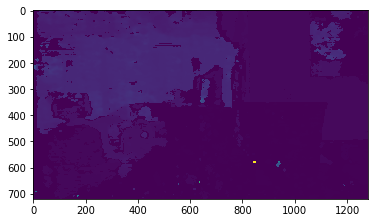

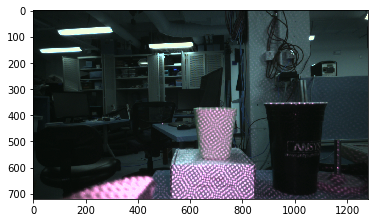

In [51]:
rawDepth,rawIR = takeImages(pipe,config,True)
plt.imshow(rawDepth)
plt.show()
plt.imshow(rawIR)
plt.show()


In [46]:
import copy

In [ ]:
def displayImg(depthImage):
    histCount, edge, tmp = plt.hist(depthImage.flatten(), bins=100)
    plt.show()
    plt.imshow(depthImage,cmap="Greys")
    plt.show()

In [ ]:
rawDepthImage = np.load("depthImage1.npy")
depthImage = copy.deepcopy(rawDepthImage)
# depthImage = 255 - ((depthImage/812)*255)
displayImg(depthImage)
minDistance = 200 # Minimum distance to consider
maxDistance = 500 # Maximum distance to consider
depthImage[depthImage > maxDistance] = maxDistance
depthImage[depthImage < minDistance] = minDistance
# Apply min-max scaling to depthImage with whiter regions further away
depthImage = ((depthImage-minDistance)/(maxDistance-minDistance))*255 
displayImg(depthImage)


In [ ]:
height,width = depthImage.shape
o3d.camera.PinholeCameraIntrinstic(
    width = rs.instrinsics.width
    height = rs.instrinsics.width
    fx=rs.instrinsics.fx
    fy=rs.instrinsics.fy
    cx=rs.instrincs.ppx
    cy=rs.instrincts.ppy
)

In [3]:
import sys
print(sys.path)

['/Users/dylankriegman/Desktop/UR5-Interface/Perception-Tests/Realsense-Test-Data', '/Library/Frameworks/Python.framework/Versions/3.8/lib/python38.zip', '/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8', '/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/lib-dynload', '', '/Users/dylankriegman/Library/Python/3.8/lib/python/site-packages', '/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages', '/Users/dylankriegman/Library/Python/3.8/lib/python/site-packages/IPython/extensions', '/Users/dylankriegman/.ipython']
